In [1]:
import numpy as np
from scipy.io import arff
from sklearn.cluster import KMeans
from scipy.cluster import vq
import matplotlib.pyplot as plt

data, meta = arff.loadarff('BreastCancerData.arff')

datan = np.matrix(list(zip(data['Class'], data['age'],data['menopause'],data['tumor-size'], 
                             data['inv-nodes'], data['node-caps'], data['deg-malig'], 
                             data['breast'], data['breast-quad'], data['irradiat'])))
print(datan.shape)
print(np.mean(data['menopause']))
dataNew = datan.T
print(dataNew[1,:])

print(dataNew.shape)

(683, 10)
3.15080527086
[[  5.   5.   3.   6.   4.   8.   1.   2.   2.   4.   1.   2.   5.   1.
    8.   7.   4.   4.  10.   6.   7.  10.   3.   1.   5.   3.   5.   2.
    1.   3.   2.  10.   2.   3.   2.  10.   6.   5.   2.  10.   6.   5.
   10.   1.   3.   1.   4.   7.   9.   5.  10.   5.  10.  10.   8.   8.
    5.   9.   5.   1.   9.   6.   1.  10.   4.   5.   8.   1.   5.   6.
    1.   9.  10.   1.   1.   5.   3.   2.   2.   4.   5.   3.   3.   5.
    3.   3.   4.   2.   1.   3.   4.   1.   2.   1.   2.   5.   9.   7.
   10.   2.   4.   8.  10.   7.  10.   1.   1.   6.   1.   8.  10.  10.
    3.   1.   8.   4.   1.   3.   1.   4.  10.   5.   5.   1.   7.   3.
    8.   1.   5.   2.   5.   3.   3.   5.   4.   3.   4.   3.   2.   9.
    1.   2.   3.   1.   3.   8.   1.   7.  10.   4.   1.   5.   1.   2.
    9.  10.   4.   3.   1.   4.   5.  10.   3.   1.   3.   1.   1.   6.
    8.   5.   2.   5.   4.   5.   1.   1.   6.   5.   8.   2.   1.  10.
    5.   1.  10.   7.   5.   1.   3.   4

In [2]:
means = np.zeros((1,10), dtype=float)

for i in range(10):
        # Hardwired, need to change to be relative
    means[0,i] = np.mean(dataNew[i, :])
    
print(means.reshape(1,10).T)


[[ 0.34992679]
 [ 4.44216691]
 [ 3.15080527]
 [ 3.21522694]
 [ 2.83016105]
 [ 3.23426061]
 [ 3.54465593]
 [ 3.44509517]
 [ 2.86969253]
 [ 1.60322108]]


In [3]:
covMatrix = np.cov(dataNew)
print(covMatrix)

[[  0.22781158   0.96234913   1.20081751   1.17237648   0.9656767
    0.733155     1.43083172   0.8865429    1.04713121   0.35019085]
 [  0.96234913   7.95669442   5.55492201   5.5087998    3.94177619
    3.2833626    6.09606145   3.82636548   4.59875785   1.7152892 ]
 [  1.20081751   5.55492201   9.39511299   8.31060356   6.20746835
    5.13470844   7.72566047   5.67324809   6.73082356   2.44702086]
 [  1.17237648   5.5087998    8.31060356   8.93161531   5.87238464
    4.79994676   7.77409909   5.38353521   6.55008093   2.28493622]
 [  0.9656767    3.94177619   6.20746835   5.87238464   8.20571654
    3.78617922   7.00026406   4.69154111   5.27402395   2.07914024]
 [  0.733155     3.2833626    5.13470844   4.79994676   3.78617922
    4.94210895   4.7446555    3.36625333   4.26810732   1.85115048]
 [  1.43083172   6.09606145   7.72566047   7.77409909   7.00026406
    4.7446555   13.27769501   6.07540264   6.49922929   2.1416448 ]
 [  0.8865429    3.82636548   5.67324809   5.38353521   

In [4]:
eigVal, eigVec = np.linalg.eig(covMatrix)

print(eigVal)

eigPairs = [(np.abs(eigVal[i]), eigVec[:,i]) for i in range(len(eigVal))]
eigPairs.sort(key=lambda x: x[0], reverse = True)
for i in eigPairs:
    print(i[0])

[  4.92360843e+01   5.11275435e+00   3.55263193e-02   4.30260247e+00
   8.06828557e-01   3.15563285e+00   1.59571626e+00   1.79673158e+00
   2.77058949e+00   2.44623377e+00]
49.2360843206
5.11275435083
4.3026024718
3.15563285376
2.77058948832
2.44623376861
1.79673158032
1.59571626351
0.806828556851
0.0355263192614


In [5]:
matrixW = np.hstack((eigPairs[0][1].reshape(10,1), eigPairs[1][1].reshape(10,1)))
    # Matrix of the value corresponding to the key of the eigenvalue we choose
    # Here, we picked k=1
print(matrixW)
newSample = matrixW.T.dot(dataNew)
print(newSample)

[[-0.0619355   0.01999117]
 [-0.29624902  0.07443633]
 [-0.4031563  -0.23047832]
 [-0.39197432 -0.16517133]
 [-0.33051002  0.09675054]
 [-0.24922357 -0.20062154]
 [-0.44188215  0.77976339]
 [-0.29151476 -0.00902866]
 [-0.35381044 -0.46954282]
 [-0.12429746 -0.18832198]]
[[ -4.89986722 -14.18416685  -4.74925133 ..., -19.6750457  -15.82357502
  -16.92151854]
 [ -0.23314791   4.51212531   0.39774281 ...,  -7.4834341   -2.70879245
   -1.42415708]]


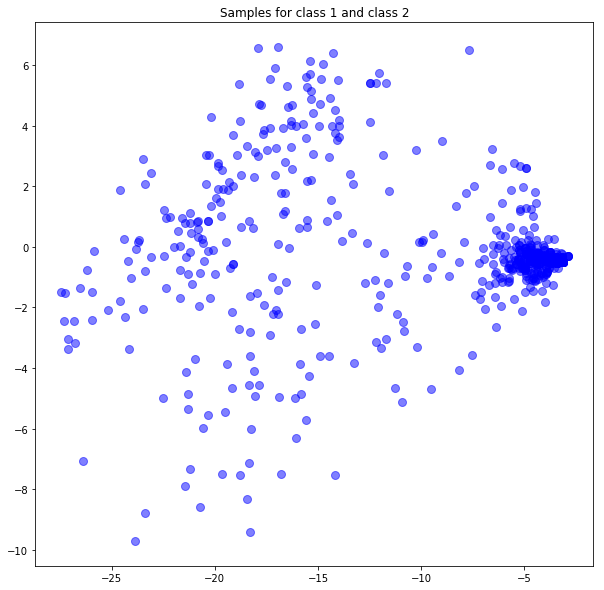

In [6]:
samplePlot = plt.figure(figsize=(10,10))
    # Changes how large the plot is to see things
#ax = samplePlot.add_subplot(111, projection='3d')
    # Creates 3 axis' in 3d
#plt.rcParams['legend.fontsize'] = 10   
plt.plot(newSample[0,:], newSample[1,:], 'o', markersize=8, color='blue', alpha=0.5)
#ax.plot(newSample[0,:], newSample[1,:], newSample[2,:], '^', markersize=8, alpha=0.5, color='red', label='class 2')
    #Plots the x,y,and z of each sample in the different clases

#plt.ylim([-5,5])

plt.title('Samples for class 1 and class 2')
#ax.legend(loc='upper right')
plt.show()

In [7]:
newS = newSample.T
print(newS.shape)

coop = KMeans(n_clusters=5).fit_predict(newS)
centroids, variance = vq.kmeans(newS,5)
print(centroids)

(683, 2)
[[-15.8582716    3.60186317]
 [-10.17807408  -1.20103211]
 [-18.2466479   -4.67611334]
 [ -4.37637246  -0.33610572]
 [-22.26032352  -0.08402956]]


In [8]:
denseCluster = np.array([])
for i in range(0, newS.shape[0]):
    if coop[i] ==4:
        denseCluster = np.append(denseCluster, (newS[i,0], newS[i,1]))

print(denseCluster.shape)
print(denseCluster[0])

(104,)
-14.459763218


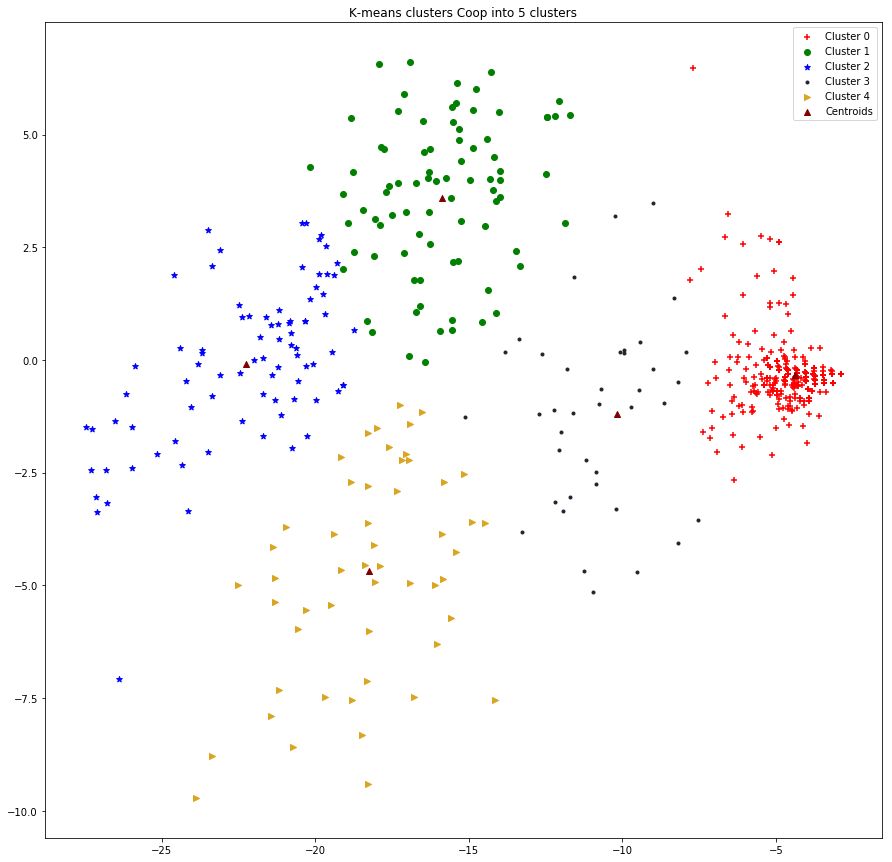

In [9]:
import pylab as pl

plt.figure(figsize=(15,15))
for i in range(0, newS.shape[0]):
    if coop[i] == 0:
        c1 = pl.scatter(newS[i,0], newS[i,1], c='r',marker='+')
    elif coop[i] == 1:
        c2 = pl.scatter(newS[i,0], newS[i,1], c='g',marker='o')
    elif coop[i] == 2:
        c3 = pl.scatter(newS[i,0],newS[i,1], c='b',marker='*')
    elif coop[i] == 3:
        c4 = pl.scatter(newS[i,0], newS[i,1], c='#22222f',marker='.')
    elif coop[i] == 4:
        c5 = pl.scatter(newS[i,0], newS[i,1], c='#daa520',marker='>')
c6 = pl.scatter(centroids[:,0], centroids[:,1], c='#800000', marker='^')
pl.legend([c1, c2, c3, c4, c5, c6],['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4',
    'Centroids'])
pl.title('K-means clusters Coop into 5 clusters')
pl.show()

In [10]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, **kwargs)
    Plot lines and/or markers to the
    :class:`~matplotlib.axes.Axes`.  *args* is a variable length
    argument, allowing for multiple *x*, *y* pairs with an
    optional format string.  For example, each of the following is
    legal::
    
        plot(x, y)        # plot x and y using default line style and color
        plot(x, y, 'bo')  # plot x and y using blue circle markers
        plot(y)           # plot y using x as index array 0..N-1
        plot(y, 'r+')     # ditto, but with red plusses
    
    If *x* and/or *y* is 2-dimensional, then the corresponding columns
    will be plotted.
    
    If used with labeled data, make sure that the color spec is not
    included as an element in data, as otherwise the last case
    ``plot("v","r", data={"v":..., "r":...)``
    can be interpreted as the first case which would do ``plot(v, r)``
    using the default line style and color.
    
    If not used wi